In [2]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

No joblib
no cmocean


In [3]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

tracername = 'VEDY'
first_year = 2014
last_year  = 2014
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'
months =np.linspace(0,11,12).astype(int)

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [4]:
# ==============================================================================
# Settings for netcdf file

save_netcdf       = True                                            # Saves the interpolated field in netcdf file
delete_old_netcdf = True                                            # If a netcdf file with the same name exists it will be deleted
input_directory  = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/' # Where the netcdf is saved
output_directory  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'
plot_netcdf       = False                                         # Reads DIN from the created netcdf file, else it plots the interpolated field (should be the same)

In [5]:
depth = mesh.zlevs
ind_max_depth = 18
depth[0:18]

array([ -0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       115., 135., 160., 190., 230., 280., 340.])

In [6]:
ind_all = np.load('index_all.npy')
ind_eu = np.load('index_eurasian.npy')
ind_am = np.load('index_amerasian.npy')
ind_sl = np.load('index_slope.npy')

# Eddy vertical advection

In [6]:
ind_bio = ind_eu
steps = 1
print np.shape(ind_bio)
#print np.shape(ind_bio)/steps

for ind in range(0,len(years)):
    ncfile       = input_directory+runid+'.'+str(years[ind])+'.oce.mean.nc'
    f           = Dataset(ncfile, 'r')
    netcdf_name = tracername+'.'+str(years[ind])+'.monthly.nc'
    
    print years[ind]
    # ==============================================================================
    # Loading data
    print 'Loading data'
    #w       = f.variables['w'][:,:].mean(axis=0)
    #din     = f.variables['tr01'][:,:].mean(axis=0)
    
    WDN = np.zeros((len(months),ind_max_depth))
    print 'looping over months'
    for mo in months:
        print mo
        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        
        w_mean = f.variables['w'][dayind,:].mean(axis=0)
        din_mean = f.variables['tr01'][dayind,:].mean(axis=0)
        count = 0
        wDN_node = np.empty((ind_max_depth,len(ind_bio)/steps,len(dayind))) * np.nan
        print np.shape(wDN_node)
        for day in dayind:
            w = f.variables['w'][day,:] - w_mean
            din = f.variables['tr01'][day,:] - din_mean
            for i in range(0,len(ind_bio)/steps):
                d_ind   = mesh.n32[ind_bio[i],0:ind_max_depth]-1
                wDN_node[:-1,i,count] = (np.diff(din[d_ind]*w[d_ind])/np.diff(depth[:ind_max_depth]))
            count = count +1
        xx = np.nansum(wDN_node,axis=2)* 2 * 24 * 3600 # seconds -> day, bi-daily
        print np.shape(xx)
        WDN[mo,:] = np.nanmean(xx,axis=1)
    np.save('profile_edyv'+str(years[ind])+'_eu.npy',WDN)

(67809,)
2014
Loading data
looping over months
0
(18, 67809, 15)
(18, 67809)
1
(18, 67809, 15)
(18, 67809)
2
(18, 67809, 15)
(18, 67809)
3
(18, 67809, 15)
(18, 67809)
4
(18, 67809, 15)
(18, 67809)
5
(18, 67809, 15)
(18, 67809)
6
(18, 67809, 15)
(18, 67809)
7
(18, 67809, 15)
(18, 67809)
8
(18, 67809, 15)
(18, 67809)
9
(18, 67809, 15)
(18, 67809)
10
(18, 67809, 15)
(18, 67809)
11
(18, 67809, 2)
(18, 67809)


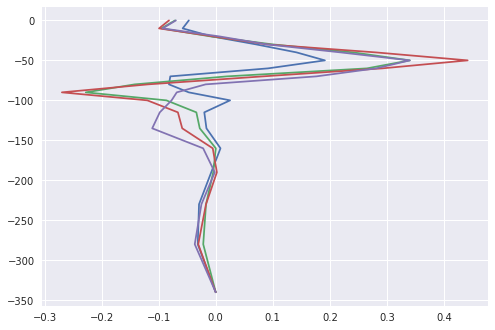

In [7]:
WDN = np.load('profile_edyv2014_eu.npy')
plt.style.use('seaborn')
plt.plot(WDN[0,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[1,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[2,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[3,:]*12,-depth[:ind_max_depth])
# 1

In [28]:
ind_bio = ind_am
steps = 1
print np.shape(ind_bio)
#print np.shape(ind_bio)/steps

for ind in range(0,len(years)):
    ncfile       = input_directory+runid+'.'+str(years[ind])+'.oce.mean.nc'
    f           = Dataset(ncfile, 'r')
    netcdf_name = tracername+'.'+str(years[ind])+'.monthly.nc'
    
    print years[ind]
    # ==============================================================================
    # Loading data
    print 'Loading data'
    #w       = f.variables['w'][:,:].mean(axis=0)
    #din     = f.variables['tr01'][:,:].mean(axis=0)
    
    WDN = np.zeros((len(months),ind_max_depth))
    print 'looping over months'
    for mo in months:
        print mo
        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        
        w_mean = f.variables['w'][dayind,:].mean(axis=0)
        din_mean = f.variables['tr01'][dayind,:].mean(axis=0)
        count = 0
        wDN_node = np.empty((ind_max_depth,len(ind_bio)/steps,len(dayind))) * np.nan
        print np.shape(wDN_node)
        for day in dayind:
            w = f.variables['w'][day,:] - w_mean
            din = f.variables['tr01'][day,:] - din_mean
            for i in range(0,len(ind_bio)/steps):
                d_ind   = mesh.n32[ind_bio[i],0:ind_max_depth]-1
                wDN_node[:-1,i,count] = (np.diff(din[d_ind]*w[d_ind])/np.diff(depth[:ind_max_depth]))
            count = count +1
        xx = np.nansum(wDN_node,axis=2)* 2 * 24 * 3600 # seconds -> day, bi-daily
        print np.shape(xx)
        WDN[mo,:] = np.nanmean(xx,axis=1)
    np.save('profile_edyv'+str(years[ind])+'_am.npy',WDN)

(105767,)
2014
Loading data
looping over months
0
(18, 105767, 15)
(18, 105767)
1
(18, 105767, 15)
(18, 105767)
2
(18, 105767, 15)
(18, 105767)
3
(18, 105767, 15)
(18, 105767)
4
(18, 105767, 15)
(18, 105767)
5
(18, 105767, 15)
(18, 105767)
6
(18, 105767, 15)
(18, 105767)
7
(18, 105767, 15)
(18, 105767)
8
(18, 105767, 15)
(18, 105767)
9
(18, 105767, 15)
(18, 105767)
10
(18, 105767, 15)
(18, 105767)
11
(18, 105767, 2)
(18, 105767)


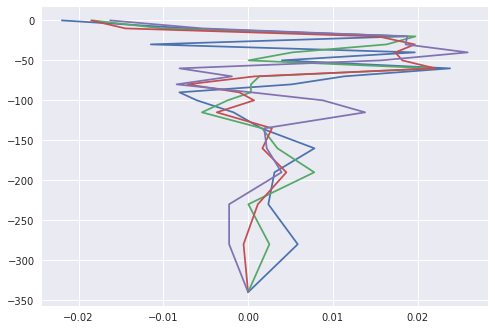

In [8]:
WDN = np.load('profile_edyv2014_am.npy')
plt.style.use('seaborn')
plt.plot(WDN[0,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[1,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[2,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[3,:]*12,-depth[:ind_max_depth])
# 1

In [30]:
ind_bio = ind_al
steps = 1
print np.shape(ind_bio)
#print np.shape(ind_bio)/steps

for ind in range(0,len(years)):
    ncfile       = input_directory+runid+'.'+str(years[ind])+'.oce.mean.nc'
    f           = Dataset(ncfile, 'r')
    netcdf_name = tracername+'.'+str(years[ind])+'.monthly.nc'
    
    print years[ind]
    # ==============================================================================
    # Loading data
    print 'Loading data'
    #w       = f.variables['w'][:,:].mean(axis=0)
    #din     = f.variables['tr01'][:,:].mean(axis=0)
    
    WDN = np.zeros((len(months),ind_max_depth))
    print 'looping over months'
    for mo in months:
        print mo
        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        
        w_mean = f.variables['w'][dayind,:].mean(axis=0)
        din_mean = f.variables['tr01'][dayind,:].mean(axis=0)
        count = 0
        wDN_node = np.empty((ind_max_depth,len(ind_bio)/steps,len(dayind))) * np.nan
        print np.shape(wDN_node)
        for day in dayind:
            w = f.variables['w'][day,:] - w_mean
            din = f.variables['tr01'][day,:] - din_mean
            for i in range(0,len(ind_bio)/steps):
                d_ind   = mesh.n32[ind_bio[i],0:ind_max_depth]-1
                wDN_node[:-1,i,count] = (np.diff(din[d_ind]*w[d_ind])/np.diff(depth[:ind_max_depth]))
            count = count +1
        xx = np.nansum(wDN_node,axis=2)* 2 * 24 * 3600 # seconds -> day, bi-daily
        print np.shape(xx)
        WDN[mo,:] = np.nanmean(xx,axis=1)
    np.save('profile_edyv'+str(years[ind])+'_sl.npy',WDN)

NameError: name 'ind_al' is not defined

In [9]:
WDN = np.load('profile_edyv2014_sm.npy')
plt.style.use('seaborn')
plt.plot(WDN[0,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[1,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[2,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[3,:]*12,-depth[:ind_max_depth])
# 1

IOError: [Errno 2] No such file or directory: 'profile_edyv2014_sm.npy'

# Mean Vertical Advection

In [8]:
ind_bio = ind_eu
steps = 1
print np.shape(ind_bio)
#print np.shape(ind_bio)/steps

for ind in range(0,len(years)):
    ncfile       = input_directory+runid+'.'+str(years[ind])+'.oce.mean.nc'
    f           = Dataset(ncfile, 'r')
    netcdf_name = tracername+'.'+str(years[ind])+'.monthly.nc'
    
    print years[ind]
    # ==============================================================================
    # Loading data
    print 'Loading data'
    #w       = f.variables['w'][:,:].mean(axis=0)
    #din     = f.variables['tr01'][:,:].mean(axis=0)
    
    WDN = np.zeros((len(months),ind_max_depth))
    print 'looping over months'
    for mo in months:
        print mo
        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        
        #print 'loading variable from netcdf file...'
        if years[ind]<2000:
            w    = f.variables['w'][mo,:]
            din    = f.variables['tr01'][mo,:]
        else:
            w    = f.variables['w'][dayind,:].mean(axis=0)
            din    = f.variables['tr01'][dayind,:].mean(axis=0)
            
        count = 0
        wDN_node = np.empty((ind_max_depth,len(ind_bio)/steps,len(dayind))) * np.nan
        print np.shape(wDN_node)
        for day in dayind:
            w = f.variables['w'][day,:] - w_mean
            din = f.variables['tr01'][day,:] - din_mean
            for i in range(0,len(ind_bio)/steps):
                d_ind   = mesh.n32[ind_bio[i],0:ind_max_depth]-1
                wDN_node[:-1,i,count] = w[d_ind[1:]]*np.diff(din[d_ind])/np.diff(depth[:ind_max_depth])
            count = count +1
        xx = np.nansum(wDN_node,axis=2)* 2 * 24 * 3600 # seconds -> day, bi-daily
        print np.shape(xx)
        WDN[mo,:] = np.nanmean(xx,axis=1)
    np.save('profile_advv'+str(years[ind])+'_eu.npy',WDN)

(67809,)
2014
Loading data
looping over months
0
(18, 67809, 15)
(18, 67809)
1
(18, 67809, 15)
(18, 67809)
2
(18, 67809, 15)
(18, 67809)
3
(18, 67809, 15)
(18, 67809)
4
(18, 67809, 15)
(18, 67809)
5
(18, 67809, 15)
(18, 67809)
6
(18, 67809, 15)
(18, 67809)
7
(18, 67809, 15)
(18, 67809)
8
(18, 67809, 15)
(18, 67809)
9
(18, 67809, 15)
(18, 67809)
10
(18, 67809, 15)
(18, 67809)
11
(18, 67809, 2)
(18, 67809)


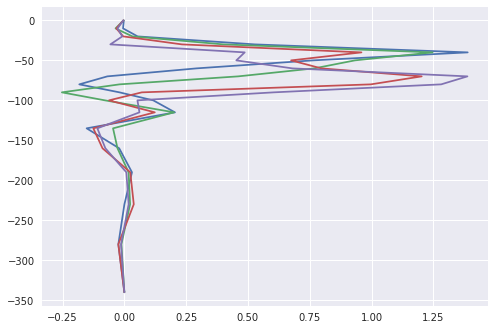

In [22]:
WDN = np.load('profile_advv2014_eu.npy')
plt.style.use('seaborn')
plt.plot(WDN[0,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[1,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[2,:]*12,-depth[:ind_max_depth])
plt.plot(WDN[3,:]*12,-depth[:ind_max_depth])
# 1

# Mean Horizontal Advection

In [10]:
from derivative import derivative

bafux_2d, bafuy_2d = derivative(mesh)
f0 = 2*7.2921e-5 * np.sin(mesh.y2/180.*np.pi)

Starting derivative calculation
Derivative calculated


In [11]:
ind_bio = ind_eu
steps = 1
print np.shape(ind_bio)
#print np.shape(ind_bio)/steps

for ind in range(0,len(years)):
    ncfile       = input_directory+runid+'.'+str(years[ind])+'.oce.mean.nc'
    f           = Dataset(ncfile, 'r')
    netcdf_name = tracername+'.'+str(years[ind])+'.monthly.nc'
    
    print years[ind]
    # ==============================================================================
    # Loading data
    print 'Loading data'
    #w       = f.variables['w'][:,:].mean(axis=0)
    #din     = f.variables['tr01'][:,:].mean(axis=0)
    
    UVDN_sl = np.zeros((len(months),ind_max_depth))
    UVDN_eu = np.zeros((len(months),ind_max_depth))
    UVDN_am = np.zeros((len(months),ind_max_depth))
    print 'looping over months'
    for mo in months:
        print mo
        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        
        #print 'loading variable from netcdf file...'
        if years[ind]<2000:
            u    = f.variables['u'][mo,:]
            v    = f.variables['v'][mo,:]
            din    = f.variables['tr01'][mo,:]
        else:
            u    = f.variables['u'][dayind,:].mean(axis=0)
            v    = f.variables['v'][dayind,:].mean(axis=0)
            din    = f.variables['tr01'][dayind,:].mean(axis=0)
            

        uvDN = np.zeros((ind_max_depth,len(mesh.x2)))
        print 'Looping over depths'
        for i in range(0,ind_max_depth):
            d_ind   = mesh.n32[:,i]-1
            (uu,vv)   = pf.vec_rotate_r2g(50, 15, -90, mesh.x2, mesh.y2, u[d_ind], v[d_ind], flag=1)
            ddin = din[d_ind]
            uDN_elem = np.sum(uu[mesh.elem],axis=1)*np.sum(ddin[mesh.elem] * bafux_2d,axis=1)
            vDN_elem = np.sum(vv[mesh.elem],axis=1)*np.sum(ddin[mesh.elem] * bafuy_2d,axis=1) #over triangle
            uvDN_elem = uDN_elem + vDN_elem
        
            #print 'Create node vector'
            uvDN_node = np.zeros(len(mesh.x2))
            uDN_node = np.zeros(len(mesh.x2))
            vDN_node = np.zeros(len(mesh.x2))
            ind_cnt = np.zeros(len(mesh.x2))
            for ii in range(0,len(mesh.elem)):
                nod_elem=mesh.elem[ii,:]
                uDN_node[nod_elem]=uDN_node[nod_elem]+uDN_elem[ii]
                vDN_node[nod_elem]=vDN_node[nod_elem]+vDN_elem[ii]
                uvDN_node[nod_elem]=uvDN_node[nod_elem]+uvDN_elem[ii]
                ind_cnt[nod_elem]=ind_cnt[nod_elem]+1.
            
            uvDN[i,:] = uvDN_node/ind_cnt
                
        UVDN_sl[mo,:] = np.mean(uvDN[:,ind_sl], axis =1)*24*3600
        UVDN_eu[mo,:] = np.mean(uvDN[:,ind_eu], axis =1)*24*3600
        UVDN_am[mo,:] = np.mean(uvDN[:,ind_am], axis =1)*24*3600
        
    np.save('profile_advh'+str(years[ind])+'_sl.npy',UVDN_sl)
    np.save('profile_advh'+str(years[ind])+'_eu.npy',UVDN_eu)
    np.save('profile_advh'+str(years[ind])+'_am.npy',UVDN_am)

(67809,)
2014
Loading data
looping over months
0
Looping over depths
1
Looping over depths
2
Looping over depths
3
Looping over depths
4
Looping over depths
5
Looping over depths
6
Looping over depths
7
Looping over depths
8
Looping over depths
9
Looping over depths
10
Looping over depths
11
Looping over depths


NameError: name 'uvDN_sl' is not defined

In [12]:
np.save('profile_advh'+str(years[ind])+'_sl.npy',UVDN_sl)
np.save('profile_advh'+str(years[ind])+'_eu.npy',UVDN_eu)
np.save('profile_advh'+str(years[ind])+'_am.npy',UVDN_am)

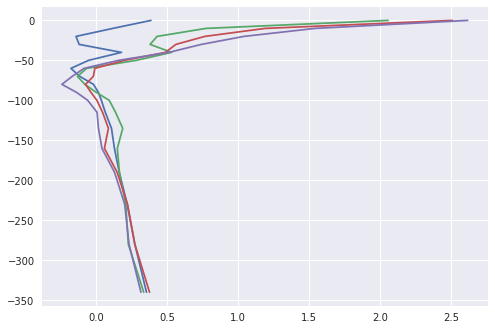

In [26]:
plt.plot(UVDN_am[0,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_am[1,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_am[2,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_am[3,:]*365,-depth[:ind_max_depth])
plt.style.use('seaborn')

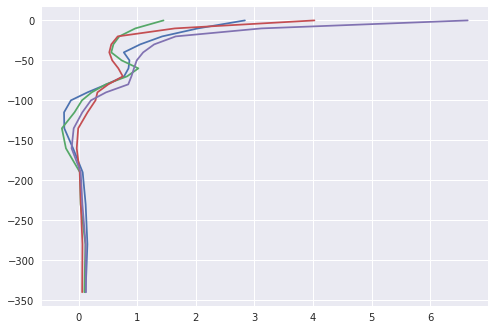

In [25]:
plt.plot(UVDN_eu[0,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_eu[1,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_eu[2,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_eu[3,:]*365,-depth[:ind_max_depth])
plt.style.use('seaborn')

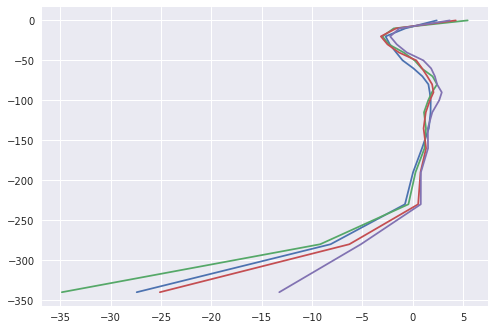

In [23]:
plt.plot(UVDN_sl[0,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_sl[1,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_sl[2,:]*365,-depth[:ind_max_depth])
plt.plot(UVDN_sl[3,:]*365,-depth[:ind_max_depth])
plt.style.use('seaborn')

# Horizontal eddy

In [ ]:
ind_bio = ind_eu
steps = 1
print np.shape(ind_bio)
#print np.shape(ind_bio)/steps

for ind in range(0,len(years)):
    ncfile       = input_directory+runid+'.'+str(years[ind])+'.oce.mean.nc'
    f           = Dataset(ncfile, 'r')
    netcdf_name = tracername+'.'+str(years[ind])+'.monthly.nc'
    
    print years[ind]
    # ==============================================================================
    # Loading data
    print 'Loading data'
    #w       = f.variables['w'][:,:].mean(axis=0)
    #din     = f.variables['tr01'][:,:].mean(axis=0)
    
    UVDN = np.zeros((len(months),ind_max_depth))
    print 'looping over months'
    for mo in months:
        print mo
        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
            
        u_mean = f.variables['u'][dayind,:].mean(axis=0)
        v_mean = f.variables['v'][dayind,:].mean(axis=0)
        din_mean = f.variables['tr01'][dayind,:].mean(axis=0)
        print 'Looping over days'
        for day in dayind:
            u = f.variables['u'][day,:] - u_mean
            v = f.variables['v'][day,:] - v_mean
            din = f.variables['tr01'][day,:] - din_mean
            uvDN = np.zeros((ind_max_depth,len(dayind),len(mesh.x2)))
            print 'Looping over depths'
            for i in range(0,ind_max_depth):
                d_ind   = mesh.n32[:,i]-1
                (uu,vv)   = pf.vec_rotate_r2g(50, 15, -90, mesh.x2, mesh.y2, u[d_ind], v[d_ind], flag=1)
                ddin = din[d_ind]
                uDN_elem = np.sum(uu[mesh.elem],axis=1)*np.sum(ddin[mesh.elem] * bafux_2d,axis=1)
                vDN_elem = np.sum(vv[mesh.elem],axis=1)*np.sum(ddin[mesh.elem] * bafuy_2d,axis=1) #over triangle
                uvDN_elem = uDN_elem + vDN_elem
        
            #print 'Create node vector'
            uvDN_node = np.zeros(len(mesh.x2))
            uDN_node = np.zeros(len(mesh.x2))
            vDN_node = np.zeros(len(mesh.x2))
            ind_cnt = np.zeros(len(mesh.x2))
            for ii in range(0,len(mesh.elem)):
                nod_elem=mesh.elem[ii,:]
                uDN_node[nod_elem]=uDN_node[nod_elem]+uDN_elem[ii]
                vDN_node[nod_elem]=vDN_node[nod_elem]+vDN_elem[ii]
                uvDN_node[nod_elem]=uvDN_node[nod_elem]+uvDN_elem[ii]
                ind_cnt[nod_elem]=ind_cnt[nod_elem]+1.
            
            uvDN[i,day,:] = uvDN_node/ind_cnt
                
        UVDN[mo,:] = np.mean(uvDN, axis =1)